In [134]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

# loading the data 

In [135]:
Image_size = 256
Batch_size = 32
Channels = 3


In [136]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "potataPlantVillage",
    shuffle=True,
    image_size = (Image_size,Image_size),
    batch_size = Batch_size,
    
)

Found 2152 files belonging to 3 classes.


In [137]:
class_names = dataset.class_names

In [138]:
len(dataset)

68

2023-05-24 03:27:45.050877: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2152]
	 [[{{node Placeholder/_0}}]]
2023-05-24 03:27:45.051288: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2152]
	 [[{{node Placeholder/_4}}]]


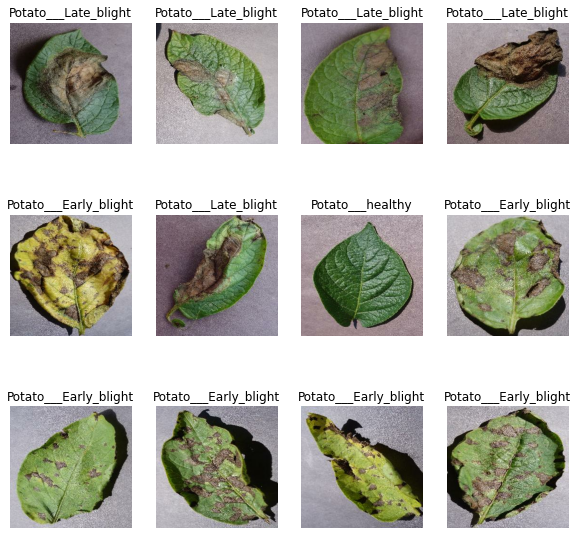

In [188]:

plt.figure(figsize = (10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

# splitting the dataset
here we will keep 80% data as training data and remaining will be used for validation and other 10 for testing

In [140]:
train_size = 0.8
eightyofdataset = len(dataset)*train_size
eightyofdataset

54.400000000000006

In [141]:
train_ds = dataset.take(54)

In [142]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [143]:
validation_size = 0.1
len(dataset)*validation_size

6.800000000000001

In [4]:
val_ds = test_ds.take(6)
test_ds = test_ds.skip(6)


NameError: name 'test_ds' is not defined

In [189]:
def get_dataset_partitionins_tf(ds,train_split = 0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    
    train_size = int(ds_size*train_split)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [190]:

train_ds,val_ds,test_ds = get_dataset_partitionins_tf(dataset)

In [191]:
len(train_ds)

54

In [148]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)


# Making essential layers

In [192]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_size,Image_size),    
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [193]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])


# Building model

In [202]:

n_classes = 3
input_shape = (Batch_size,256,256,Channels)

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    
    layers.Conv2D(32,kernel_size = (3,3),activation="relu",padding='same',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(32,kernel_size = (3,3),activation="relu",padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,kernel_size = (3,3),activation="relu",padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,kernel_size = (3,3),activation="relu",padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,kernel_size = (3,3),activation="relu",padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,kernel_size = (3,3),activation="relu",padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,kernel_size = (3,3),activation="relu",padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,kernel_size = (3,3),activation="relu",padding='same'),
    layers.MaxPooling2D((2,2)),
    
    
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(n_classes,activation="softmax"),
    
])

In [203]:
model.build(input_shape=input_shape)

In [204]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_18 (Sequential)  (None, 256, 256, 3)       0         
                                                                 
 sequential_19 (Sequential)  (None, 256, 256, 3)       0         
                                                                 
 conv2d_66 (Conv2D)          (32, 256, 256, 32)        896       
                                                                 
 max_pooling2d_66 (MaxPooli  (32, 128, 128, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_67 (Conv2D)          (32, 128, 128, 32)        9248      
                                                                 
 max_pooling2d_67 (MaxPooli  (32, 64, 64, 32)          0         
 ng2D)                                               

In [207]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [208]:
history = model.fit(
    train_ds,
    epochs=50,
    batch_size = Batch_size,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
54/54 [==============================] - ETA: 0s - loss: 0.9191 - accuracy: 0.4803

2023-05-24 03:31:10.090335: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2152]
	 [[{{node Placeholder/_4}}]]
2023-05-24 03:31:10.090514: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2152]
	 [[{{node Placeholder/_4}}]]


54/54 [==============================] - 34s 582ms/step - loss: 0.9191 - accuracy: 0.4803 - val_loss: 0.8735 - val_accuracy: 0.4948
Epoch 2/50
54/54 [==============================] - 25s 444ms/step - loss: 0.7370 - accuracy: 0.6326 - val_loss: 0.4901 - val_accuracy: 0.8281
Epoch 3/50
54/54 [==============================] - 25s 448ms/step - loss: 0.4332 - accuracy: 0.8192 - val_loss: 0.2677 - val_accuracy: 0.8906
Epoch 4/50
54/54 [==============================] - 25s 455ms/step - loss: 0.3518 - accuracy: 0.8562 - val_loss: 0.3546 - val_accuracy: 0.8281
Epoch 5/50
54/54 [==============================] - 29s 531ms/step - loss: 0.2982 - accuracy: 0.8838 - val_loss: 0.3167 - val_accuracy: 0.8646
Epoch 6/50
54/54 [==============================] - 30s 540ms/step - loss: 0.2564 - accuracy: 0.8973 - val_loss: 0.1809 - val_accuracy: 0.9271
Epoch 7/50
54/54 [==============================] - 28s 508ms/step - loss: 0.2198 - accuracy: 0.9196 - val_loss: 0.1640 - val_accuracy: 0.9271
Epoch 8/50

In [209]:
history

In [210]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [211]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [3]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(50),acc,label='Training accuracy')
plt.plot(range(50),val_acc,label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(50),loss,label='Training loss')
plt.plot(range(50),val_loss,label='Validation loss')
plt.legend(loc='lower right')
plt.title('Training and Validation loss')


NameError: name 'plt' is not defined

2023-05-24 04:16:59.990629: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2152]
	 [[{{node Placeholder/_4}}]]
2023-05-24 04:16:59.991320: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2152]
	 [[{{node Placeholder/_0}}]]


first image to predict
actual_label Potato___Early_blight
1/1 [==============================] - 0s 123ms/step
predicted label Potato___Late_blight


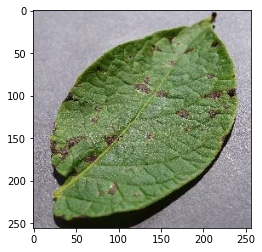

In [235]:

for image_batch,labels_batch in test_ds.take(1):
        first_image = image_batch[i].numpy().astype('uint8')
        first_label = labels_batch[i].numpy()

        print("first image to predict")
        plt.imshow(first_image)
        print("actual_label",class_names[first_label])

        batch_prediction = model.predict(image_batch)
        print("predicted label",class_names[np.argmax(batch_prediction[0])])
    

In [237]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    
    confidence = round(100*(np.max(predictions[0])),2)
    
    return predicted_class,confidence

2023-05-24 04:31:08.453846: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2152]
	 [[{{node Placeholder/_4}}]]
2023-05-24 04:31:08.454527: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2152]
	 [[{{node Placeholder/_4}}]]


1/1 [==============================] - 0s 13ms/step


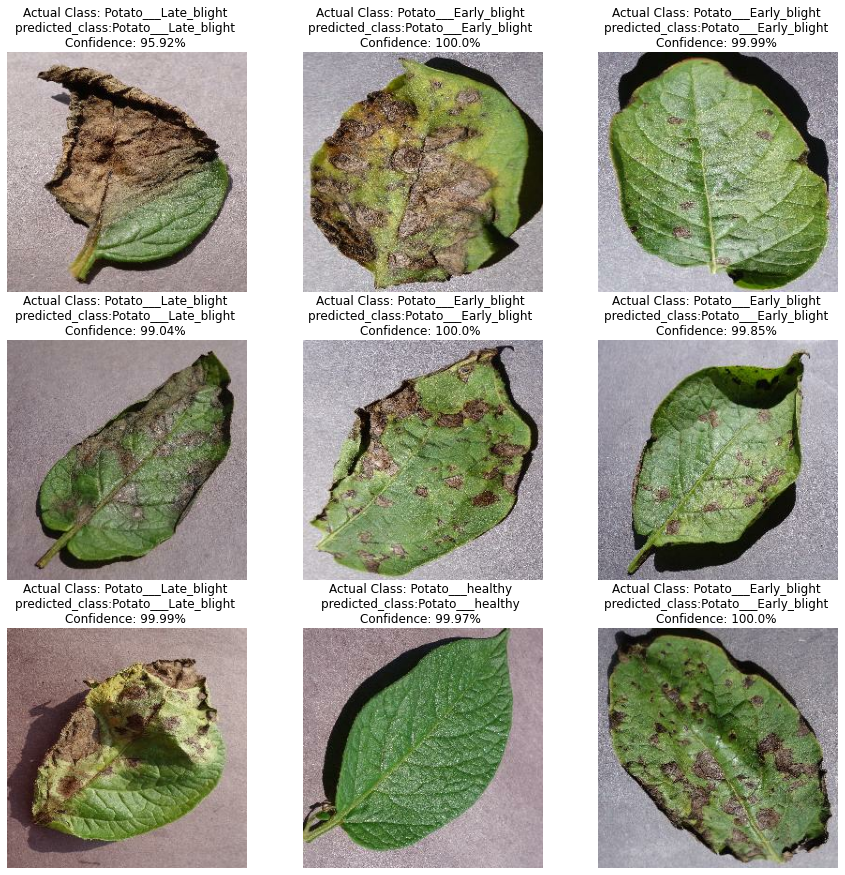

In [256]:
plt.figure(figsize=(15,15))
for images,labels, in test_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        
        predicted_class,confidence = predict(model,images[i].numpy())
        
        actual_class = class_names[labels[i]]
        plt.title(f"Actual Class: {actual_class} \npredicted_class:{predicted_class} \nConfidence: {confidence}% ")
        
        plt.axis("off")
        
        

In [268]:
model_version = 1
model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/1/assets


INFO:tensorflow:Assets written to: models/1/assets


In [269]:
print(tf. __version__)


2.13.0-rc0
